<a href="https://colab.research.google.com/github/geneticterror/DigitalDesignSchool/blob/main/Seminar3_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar 3. Neural Networks

## Intro to Pytorch

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F

from torch import nn
from tqdm import tqdm

%matplotlib inline

###  Recall **NumPy** and compare operations its functionality with **PyTorch**

We can create matrices, multiply them, add, transpose, and generally perform any matrix operations

In [2]:
random_matrix = np.random.rand(5, 3)
print(random_matrix)

[[0.38893339 0.80229746 0.33585025]
 [0.00320795 0.79298709 0.61267369]
 [0.25927521 0.32901692 0.540573  ]
 [0.57765337 0.67379377 0.21638981]
 [0.81694972 0.76178298 0.12382491]]


In [3]:
print(random_matrix + 5)

[[5.38893339 5.80229746 5.33585025]
 [5.00320795 5.79298709 5.61267369]
 [5.25927521 5.32901692 5.540573  ]
 [5.57765337 5.67379377 5.21638981]
 [5.81694972 5.76178298 5.12382491]]


In [4]:
print(random_matrix @ random_matrix.T)

[[0.90774579 0.84322582 0.54636181 0.83792629 0.9705022 ]
 [0.84322582 1.00420787 0.59293277 0.66873919 0.68256907]
 [0.54636181 0.59293277 0.46769494 0.48843524 0.52939071]
 [0.83792629 0.66873919 0.48843524 0.83450601 1.01199283]
 [0.9705022  0.68256907 0.52939071 1.01199283 1.26305275]]


In [5]:
torch_random_matrix = torch.rand(5, 3)
torch_random_matrix

tensor([[0.6972, 0.6849, 0.9836],
        [0.8289, 0.2578, 0.3773],
        [0.9414, 0.0495, 0.9964],
        [0.3312, 0.4508, 0.2473],
        [0.8995, 0.1949, 0.3965]])

In [6]:
print(torch_random_matrix + 5)

tensor([[5.6972, 5.6849, 5.9836],
        [5.8289, 5.2578, 5.3773],
        [5.9414, 5.0495, 5.9964],
        [5.3312, 5.4508, 5.2473],
        [5.8995, 5.1949, 5.3965]])


In [7]:
print(torch.matmul(torch_random_matrix, torch_random_matrix.transpose(1, 0)))

tensor([[1.9227, 1.1257, 1.6703, 0.7829, 1.1506],
        [1.1257, 0.8960, 1.1691, 0.4841, 0.9454],
        [1.6703, 1.1691, 1.8815, 0.5805, 1.2514],
        [0.7829, 0.4841, 0.5805, 0.3741, 0.4838],
        [1.1506, 0.9454, 1.2514, 0.4838, 1.0042]])


There are different types of multiplication.

- `torch.mm` - performs a matrix multiplication without broadcasting - (2D tensor) by (2D tensor).

It expects two 2D tensors so n×m * m×p = n×p
- `torch.mul` - performs a elementwise multiplication with broadcasting - (Tensor) by (Tensor or Number)
- `torch.matmul` - matrix product with broadcasting - (Tensor) by (Tensor) with different behaviors depending on the tensor shapes (dot product, matrix product, batched matrix products).


### Pytorch tensors basic operations

In [8]:
# empty tensor
x = torch.empty(5, 3)
x

tensor([[-4.3270e+11,  4.3786e-41, -1.3997e+15],
        [ 3.1629e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 3.1633e-41,  7.7052e+31,  7.2148e+22],
        [ 1.5766e-19,  1.0256e-08,  1.0501e-05]])

In [9]:
# tensors with zeros of type float
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
# tensor from a python list
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [12]:
# create a random tensor of an other tensor shape
x = torch.randn_like(x, dtype=torch.float)
x

tensor([-0.2091,  0.6048])

In [13]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

print(x,'\n', y)

tensor([[0.6859, 0.0938, 0.0622],
        [0.5020, 0.6523, 0.3318],
        [0.6318, 0.1489, 0.8271],
        [0.9474, 0.6831, 0.6186],
        [0.3842, 0.7171, 0.9520]]) 
 tensor([[0.9347, 0.2700, 0.3393],
        [0.6860, 0.3920, 0.1770],
        [0.0072, 0.2198, 0.9788],
        [0.2445, 0.8423, 0.3489],
        [0.0252, 0.0891, 0.8090]])


In [14]:
x + y

tensor([[1.6206, 0.3638, 0.4015],
        [1.1880, 1.0444, 0.5088],
        [0.6390, 0.3687, 1.8059],
        [1.1919, 1.5254, 0.9675],
        [0.4094, 0.8062, 1.7610]])

In [15]:
z = torch.add(x, y)
z

tensor([[1.6206, 0.3638, 0.4015],
        [1.1880, 1.0444, 0.5088],
        [0.6390, 0.3687, 1.8059],
        [1.1919, 1.5254, 0.9675],
        [0.4094, 0.8062, 1.7610]])

In [16]:
torch.add(x, y, out=x)
x

tensor([[1.6206, 0.3638, 0.4015],
        [1.1880, 1.0444, 0.5088],
        [0.6390, 0.3687, 1.8059],
        [1.1919, 1.5254, 0.9675],
        [0.4094, 0.8062, 1.7610]])

In [21]:
# increase a dimensionality
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [22]:
# remove one single dimension
x.unsqueeze(0).unsqueeze(1).squeeze(0).shape

torch.Size([1, 5, 3])

In [19]:
# remove all single dimension
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [23]:
# operations without _ do not change the tensor, but create a copy
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [24]:
# operations with _ change the tensor
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

In [25]:
#We can do regular slices and convert matrices from **PyTorch** to **NumPy** and vice versa:

a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [26]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

## LHCb particle identification

You task is to identify a particle type using the responses in the detector systems using Neural Networks.

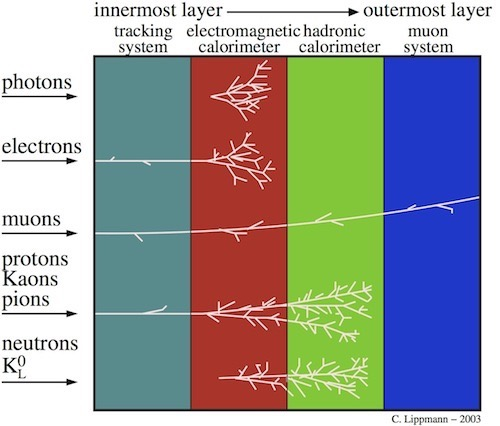

In [27]:
!wget https://github.com/yandexdataschool/mlhep2020-assignments/raw/master/data/1.3.1-logistic-regression/PID-dataset-subsample.csv.gz

--2023-07-27 15:08:15--  https://github.com/yandexdataschool/mlhep2020-assignments/raw/master/data/1.3.1-logistic-regression/PID-dataset-subsample.csv.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yandexdataschool/mlhep2020-assignments/master/data/1.3.1-logistic-regression/PID-dataset-subsample.csv.gz [following]
--2023-07-27 15:08:15--  https://raw.githubusercontent.com/yandexdataschool/mlhep2020-assignments/master/data/1.3.1-logistic-regression/PID-dataset-subsample.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13048336 (12M) [application/octet-stream]
Saving to: ‘PID-dataset-s

In [28]:
df = pd.read_csv('/content/PID-dataset-subsample.csv.gz')
df.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,4783.899908,15.0,0.992629,1.0,1.0,3.2,-0.753252,5.095674,1.0,-0.744993,...,25.0,1.0,-0.272898,-9.828998,23413.300773,1.0,1.0,0.000011,12.092303,-2.605698
1,21113.160174,16.0,-0.454772,1.0,1.0,3.2,-3.027843,14.091743,1.0,1.282079,...,28.0,1.0,-78.682187,8.813811,1612.774429,1.0,1.0,2.742716,4.840911,-53.067288
2,2004.359973,14.0,-0.060743,0.0,1.0,0.0,-2.723425,-0.000016,1.0,0.107044,...,27.0,0.0,-0.017021,-33.895621,-999.000000,0.0,0.0,0.000019,-0.000021,-0.000021
3,12877.429683,14.0,-0.638981,0.0,1.0,3.2,-3.283638,4.084645,1.0,0.079914,...,29.0,1.0,13.235793,9.094493,3562.783455,0.0,1.0,1.645638,1.392493,26.947293
4,73979.062493,18.0,0.484596,1.0,1.0,3.2,-2.441371,8.700628,1.0,0.936483,...,36.0,1.0,-2.929998,0.781402,2286.271726,1.0,1.0,2.742734,0.433102,0.430202


### Data preprocessing

In [29]:
X = df.drop('Label', axis=1)
y = df['Label']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Let`s speed up training with data *standartization*.  

⚠️ When the input features are not all on the same scale, neural network takes significantly longer to train because the gradient descent algorithm takes longer to converge.

Additionally, the high values of specific features can propagate through the layers leading to the accumulation of large error gradients that make the training process unstable, called the *problem of exploding gradients*.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In order to iterate over the data we need to create your own class inherited from `torch.utils.data.Dataset`.

In [37]:
class ParticleDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float), self.y[idx]

In [38]:
train_dataset = ParticleDataset(X_train_scaled, y_train_le)

In [40]:
test_dataset = ParticleDataset(X_test_scaled, y_test_le)

In [41]:
test_dataset.__getitem__(1)

(tensor([ 0.2335, -0.9164,  0.5162,  2.0489,  0.4159,  0.4174,  0.4675,  0.2035,
          0.2285,  0.4812, -1.0850,  0.4182,  0.0649, -0.2275, -0.3469, -0.3874,
         -0.1768,  0.4153,  0.4539,  2.0391,  0.5540, -0.0427,  0.4245,  5.7182,
          0.0389,  0.4045,  0.5536,  3.5837,  0.4721,  2.0449, -0.3771,  1.9419,
          1.2059, -0.4701,  0.5580,  0.1374,  0.9907,  0.5171,  0.5595, -0.2275,
          0.2969,  0.0599,  0.2296, -0.1045,  2.2352,  0.4654,  0.3759,  0.2295,
          0.0853]),
 3)

In order to get batches from data in pytorch, such an entity as a dataloader is used, which takes as input a class inherited from `torch.utils.data.Dataset`.

In [42]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle = True)

In [43]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle = True)

In [44]:
batch = next(iter(train_dataloader))

print(f"Sample:\n{batch[0]}")
print(f"Target:\n{batch[1]}")

Sample:
tensor([[-0.5082,  0.0685,  0.5220,  ..., -2.3816,  0.2293,  0.2498],
        [-0.3330,  0.8073,  0.5230,  ...,  0.3759,  0.2419,  0.2910],
        [-0.3477,  0.3148,  0.5161,  ...,  0.3706,  0.2224,  0.3458],
        ...,
        [-0.1965,  0.3148,  0.5159,  ...,  0.3706,  0.2030,  0.2166],
        [-0.0666,  0.3148,  0.5209,  ...,  0.5195,  0.2696,  0.2477],
        [-0.1149,  0.3148,  0.5229,  ...,  0.6872,  0.2712,  0.2021]])
Target:
tensor([3, 5, 2, 5, 3, 4, 5, 5, 3, 3, 1, 2, 3, 2, 2, 1, 3, 1, 0, 0, 1, 5, 2, 5,
        2, 0, 1, 3, 5, 2, 0, 5, 2, 0, 4, 2, 4, 3, 3, 1, 0, 5, 0, 2, 1, 3, 0, 1,
        2, 3, 3, 5, 4, 4, 4, 3, 2, 0, 3, 4, 0, 4, 1, 0])


### Neural network construction

In order to create neural networks in high-level **PyTorch**, the `torch.nn` module is used. The neural network must be inherited from the `nn.Module` class. An example of how it might look for 10-class classification:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.dense1 = nn.Linear(764, 100)
        self.dense2 = nn.Linear(100, 10)

    def forward(self, x):
       x = nn.ReLU(self.dense1(x))
       return nn.Sigmoid(self.dense2(x))
```

As we can see in this example, this class **should** have a `forward` method, which defines the forward passage of the neural network. You can see that the `nn` module contains the implementation of most layers, and activation functions.

In [45]:
class ParticleTypeModel(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()
        self.n_features = n_features
        self.n_classes = n_classes
        self.lin1 = nn.Linear(self.n_features, 100)
        self.lin2 = nn.Linear(100, 50)
        self.lin3 = nn.Linear(50, self.n_classes)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        return x

### Device compatibility

In [46]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [47]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [48]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cpu')

### Training

Let`s train the model on the training set.


We`ll the [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) optimizer to optimize the cross-entropy loss. The training is pretty straightforward: iterate through each batch, do a forward pass, compute gradients, do a gradient descent and repeat this process for as many epochs as needed.

In [ ]:
model = ParticleTypeModel(X.shape[1], y.nunique())
to_device(model, device)

ParticleTypeModel(
  (lin1): Linear(in_features=49, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_features=6, bias=True)
)

#### Optimizer

In [ ]:
import torch.optim as torch_optim

In [ ]:
def get_optimizer(model, lr = 0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optim = torch_optim.Adam(parameters, lr=lr)
    return optim

#### Training function

In [ ]:
def train_model(model, optim, train_dl):
    #Put the model in training mode
    model.train()
    total = 0
    sum_loss = 0
    for x_batch, y_batch in train_dl:
        current_batch_size = y_batch.shape[0]
        #model predictions
        output = model(x_batch)
        #backpropagation
        loss = F.cross_entropy(output, y_batch)
        optim.zero_grad()
        loss.backward()
        optim.step()
        #total loss
        total += current_batch_size
        sum_loss += current_batch_size*(loss.item())
    return sum_loss/total

#### Evaluation function

In [ ]:
def test_loss(model, test_dl):
    #Put the model in evaluation mode
    model.eval()
    total = 0
    sum_loss = 0
    correct = 0
    for x_batch, y_batch in test_dl:
        current_batch_size = y_batch.shape[0]
        #model predictions
        output = model(x_batch)
        # total loss and accuracy
        loss = F.cross_entropy(output, y_batch)
        sum_loss += current_batch_size*(loss.item())
        total += current_batch_size
        pred = torch.max(output, 1)[1]
        correct += (pred == y_batch).float().sum().item()
    #print("test loss %.3f and accuracy %.3f" % (sum_loss/total, correct/total))
    return sum_loss/total, correct/total

In [ ]:
def train_loop(model, epochs, lr=0.01):
    optim = get_optimizer(model, lr = lr)
    train_loss_list = []
    test_loss_list = []
    test_accuracy_list = []
    for i in tqdm(range(epochs)):
        loss = train_model(model, optim, train_dataloader)
        train_loss_list.append(loss)
        #print("training loss: ", loss)
        losses, accuracies = test_loss(model, test_dataloader)
        test_loss_list.append(losses)
        test_accuracy_list.append(accuracies)
    return train_loss_list, test_loss_list, test_accuracy_list

#### Model train

In [ ]:
train_dataloader = DeviceDataLoader(train_dataloader, device)
test_dataloader = DeviceDataLoader(test_dataloader, device)

In [ ]:
train_loss_list, test_loss_list, test_accuracy_list = train_loop(model, epochs=20, lr=0.05)

100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


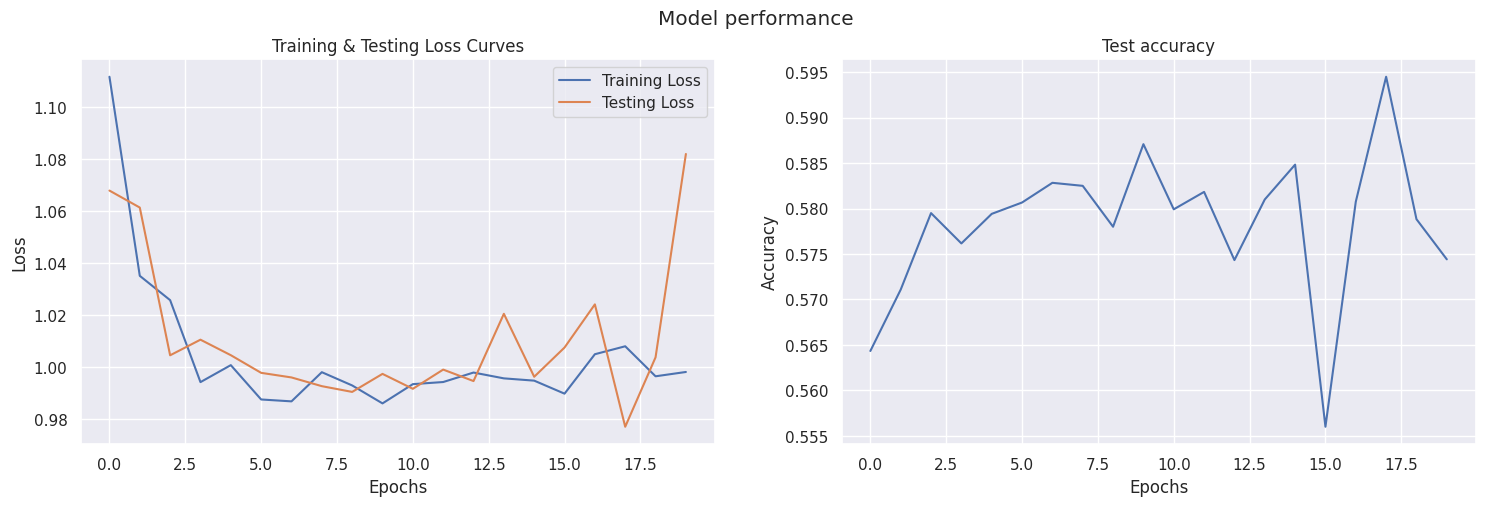

In [ ]:
sns.set_theme()

def plot_learning_curves(train_loss_list, test_loss_list, test_accuracy_list, title):
  fig = plt.figure(figsize = (18,5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.plot(train_loss_list, label='Training Loss')
  ax1.plot(test_loss_list, label='Testing Loss')
  ax2.plot(test_accuracy_list)

  fig.suptitle(title)
  ax1.set_title('Training & Testing Loss Curves')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epochs')
  ax1.legend()
  ax2.set_title('Test accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epochs');

plot_learning_curves(train_loss_list, test_loss_list, test_accuracy_list, 'Model performance')

❓Can we do better

We have normalized the network input in order to speed up training. But is the input layer the only layer, that inputs neurons?

No. For a network with hidden layers, the output of layer k-1 serves as the input to layer k. If the inputs to a particular layer change drastically, we can again run into the problem of unstable gradients.


### Normalization and dropout

##### Batch Normalization

For any hidden layer *h*, we pass the inputs through a non-linear activation to get the output. For every neuron (activation) in a particular layer, we can force the pre-activations to have zero mean and unit standard deviation. This can be achieved by subtracting the mean from each of the input features across the mini-batch and dividing by the standard deviation.

However, forcing all the pre-activations to be zero and unit standard deviation across all batches can be too restrictive. It may be the case that the fluctuant distributions are necessary for the network to learn certain classes better.

To address this, batch normalization introduces two parameters: a scaling factor gamma ($\gamma$) and an offset beta (β). These are learnable parameters, so if the fluctuation in input distribution is necessary for the neural network to learn a certain class better, then the network learns the optimal values of gamma and beta for each mini-batch.


$y_i = \gamma * x' + β,$

where $x'$ is standartized x.


In [ ]:
class ParticleTypeModel(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()
        self.n_features = n_features
        self.n_classes = n_classes
        self.lin1 = nn.Linear(self.n_features, 100)
        self.lin2 = nn.Linear(100, 50)
        self.lin3 = nn.Linear(50, self.n_classes)
        self.bn1 = nn.BatchNorm1d(100)
        self.bn2 = nn.BatchNorm1d(50)
        self.drop = nn.Dropout(0.25)


    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = self.bn1(x)
        x = self.drop(x)
        x = F.relu(self.lin2(x))
        x = self.bn2(x)
        x = self.drop(x)
        x = self.lin3(x)
        return x

In [ ]:
model = ParticleTypeModel(X.shape[1], y.nunique())
to_device(model, device)

ParticleTypeModel(
  (lin1): Linear(in_features=49, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_features=6, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.25, inplace=False)
)

In [ ]:
train_loss_list, test_loss_list, test_accuracy_list = train_loop(model, epochs=20, lr=0.05)

100%|██████████| 20/20 [00:59<00:00,  2.99s/it]


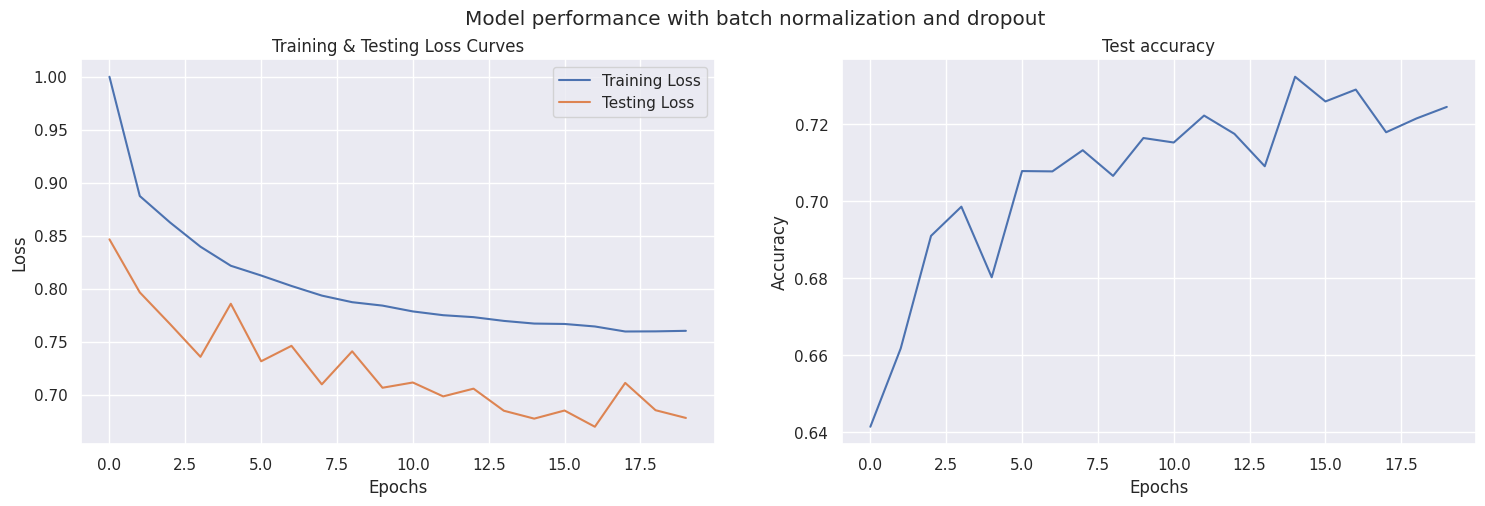

In [ ]:
plot_learning_curves(train_loss_list, test_loss_list, test_accuracy_list, 'Model performance with batch normalization and dropout')

⚠️ *In batch normalization, we use the batch statistics: the mean and standard deviation corresponding to the current mini-batch.*


*However, when the batch size is small, the sample mean and sample standard deviation are not representative enough of the actual distribution and the network cannot learn anything meaningful.*

##### Layer Normalization

 In layer normalization, all neurons in a particular layer effectively have the same distribution across all features for a given input.

In [ ]:
class ParticleTypeModel(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()
        self.n_features = n_features
        self.n_classes = n_classes
        self.lin1 = nn.Linear(self.n_features, 100)
        self.lin2 = nn.Linear(100, 50)
        self.lin3 = nn.Linear(50, self.n_classes)
        self.ln1 = nn.LayerNorm(100)
        self.ln2 = nn.LayerNorm(50)
        self.drop = nn.Dropout(0.25)


    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = self.ln1(x)
        x = self.drop(x)
        x = F.relu(self.lin2(x))
        x = self.ln2(x)
        x = self.drop(x)
        x = self.lin3(x)
        return x

In [ ]:
model = ParticleTypeModel(X.shape[1], y.nunique())
to_device(model, device)

ParticleTypeModel(
  (lin1): Linear(in_features=49, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_features=6, bias=True)
  (ln1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.25, inplace=False)
)

In [ ]:
train_loss_list, test_loss_list, test_accuracy_list = train_loop(model, epochs=20, lr=0.05)

100%|██████████| 20/20 [01:05<00:00,  3.29s/it]


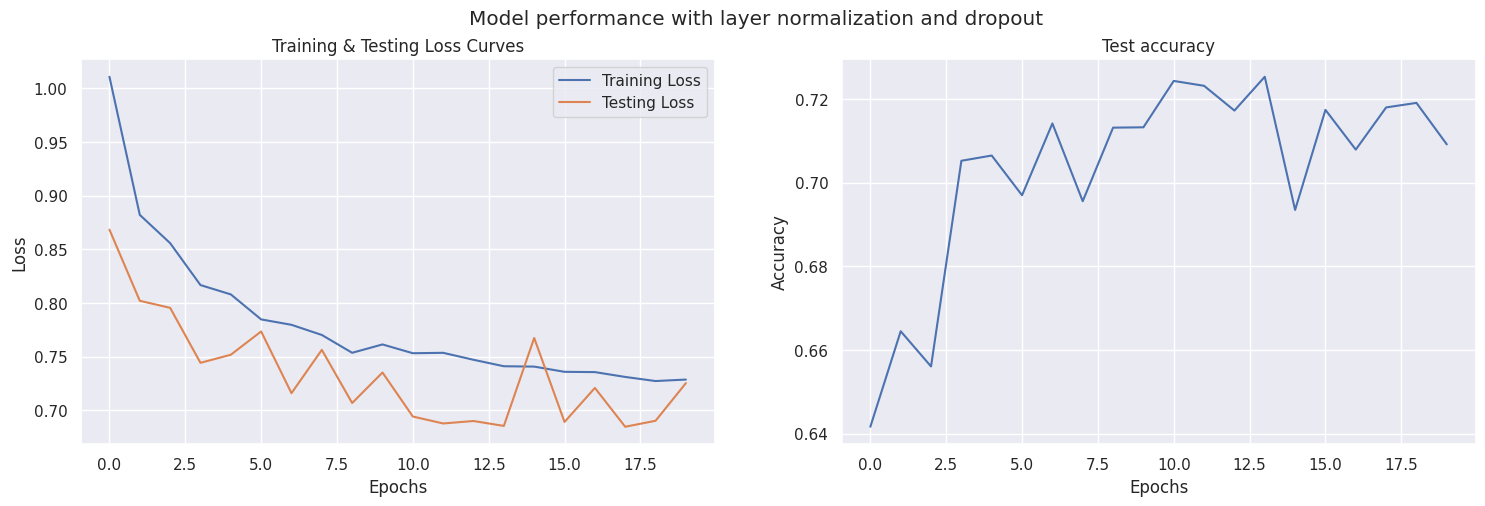

In [ ]:
plot_learning_curves(train_loss_list, test_loss_list, test_accuracy_list, 'Model performance with layer normalization and dropout')

💡*To sum up,*

*Pytorch allows to sequentially construct the neural networks, adding layers one-by-one.*

*To prevent overfitting, one can use drop-out technique.*

*Batch and layer normalization are two strategies for training neural networks faster.*

*Batch normalization normalizes each feature independently across the mini-batch. Layer normalization normalizes each of the inputs in the batch independently across all features.*

*As batch normalization is dependent on batch size, it’s not effective for small batch sizes. Layer normalization is independent of the batch size, so it can be applied to batches with smaller sizes as well.*



**Extra materials:**


* [Pytorch book](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Pytorch with GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch: A 60 MINUTE BLITZ](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Automatic differentiation in pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)